In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("banknotes.csv")
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
df.shape

(1372, 5)

In [6]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [7]:
x = df.drop('Class', axis=1)
y = df['Class']

<Axes: xlabel='Class', ylabel='count'>

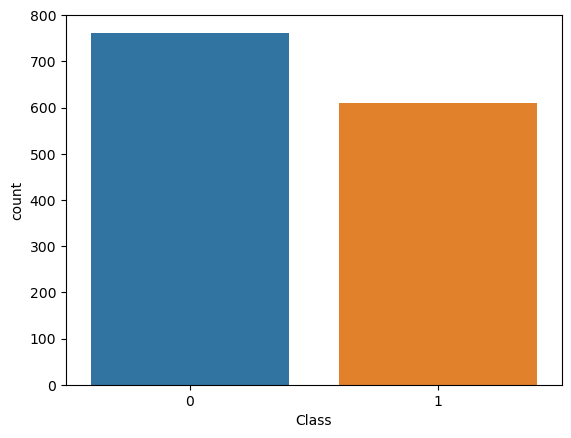

In [8]:
sns.countplot(x = y)

In [10]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

### Cross Validation

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, random_state=0, test_size=0.25)

In [13]:
x_train.shape

(1029, 4)

In [14]:
y_train.shape

(1029,)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier(random_state=0)

In [17]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Evaluation

In [19]:
y_pred = dt.predict(x_test)

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

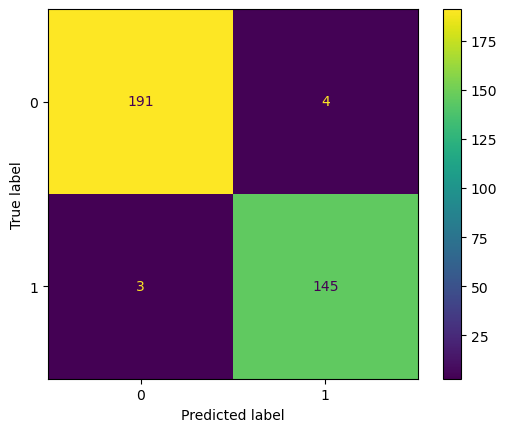

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test, y_pred)

0.9795918367346939

### Plot the tree

In [27]:
from sklearn.tree import plot_tree

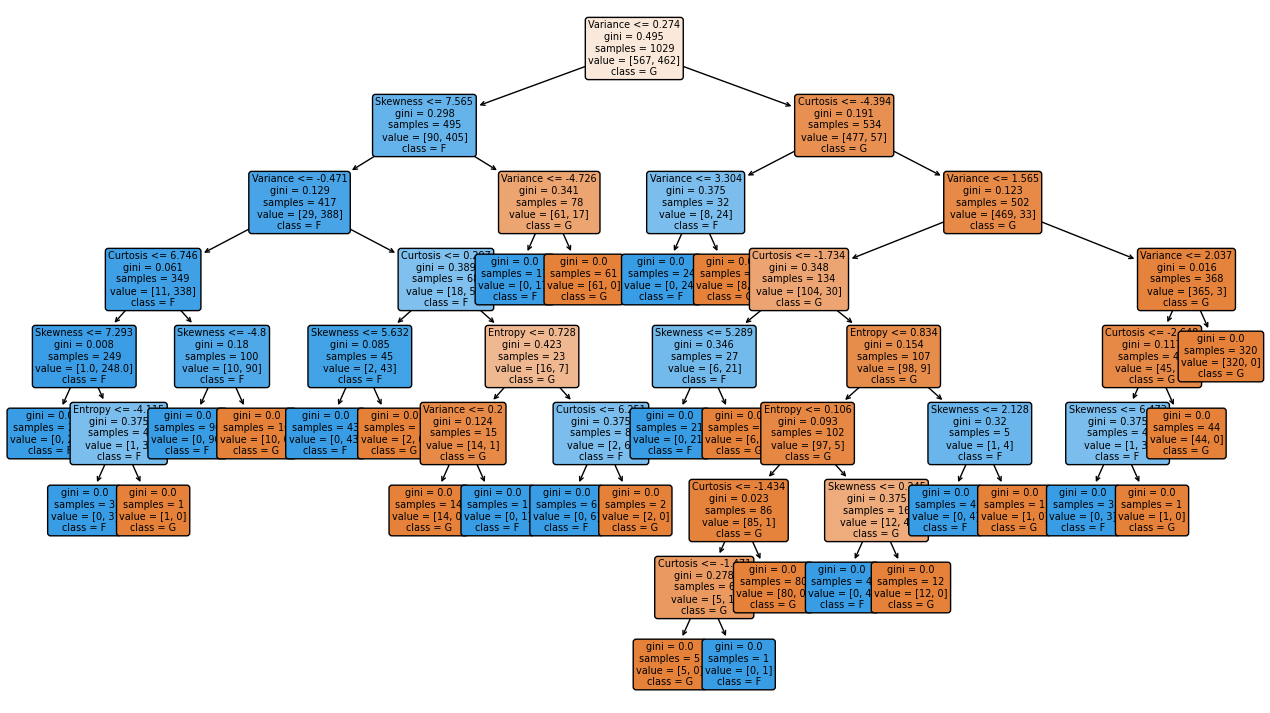

In [30]:
plt.figure(figsize=(16,9))
plot_tree(dt, fontsize=7, filled=True, rounded=True, class_names=['G','F'], feature_names=x.columns);

In [34]:
imp = dt.feature_importances_

In [35]:
imp

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

<BarContainer object of 343 artists>

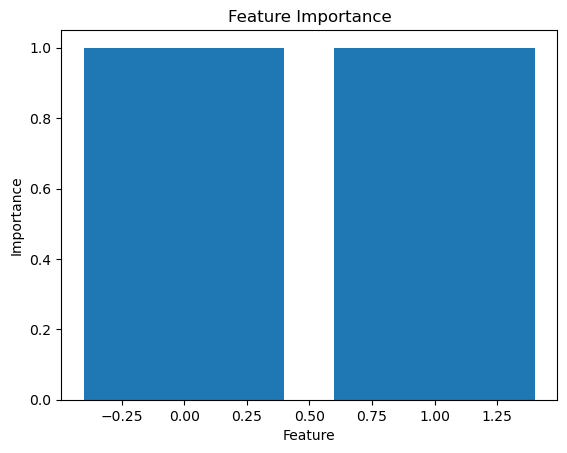

In [42]:
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.bar(y_test, y_pred)